In [123]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Sklearn Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


# Sklearn Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate
from sklearn.tree import export_graphviz

# Custom Module's


import warnings
warnings.filterwarnings("ignore")

from env import user, password, host

In [124]:
def get_db_url(url):
    url = f'mysql+pymysql://{user}:{password}@{host}/{url}'
    return url

In [125]:
sql_query = """
            
    select *
    from properties_2017 as prop
    join(
        select parcelid, max(transactiondate) as transactiondate
        from predictions_2017
        group by parcelid
         ) as txn using(parcelid)
    join predictions_2017 as pred using(parcelid, transactiondate)
    left join airconditioningtype as act using (airconditioningtypeid)
    left join architecturalstyletype as ast using(architecturalstyletypeid)
    left join buildingclasstype as bct using(buildingclasstypeid)
    left join heatingorsystemtype as hst using(heatingorsystemtypeid)
    left join propertylandusetype as plt using(propertylandusetypeid)
    left join storytype as st using(storytypeid)
    left join typeconstructiontype as tct using(typeconstructiontypeid)
    where latitude IS NOT NULL and longitude IS NOT NULL; """

df = pd.read_sql(sql_query, get_db_url('zillow'))

In [126]:
df.head(3)

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,transactiondate,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,2017-01-01,1727539,NaN,3.5,4.0,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,None,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,1.0,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0,0.025595,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,2017-01-01,1387261,NaN,1.0,2.0,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,None,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,1,0.055619,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2017-01-01,11677,NaN,2.0,3.0,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,None,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,2,0.005383,None,None,None,None,Single Family Residential,None,None


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77381 non-null  float64
 3   heatingorsystemtypeid         49440 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   parcelid                      77381 non-null  int64  
 8   transactiondate               77381 non-null  object 
 9   id                            77381 non-null  int64  
 10  basementsqft                  50 non-null     float64
 11  bathroomcnt                   77381 non-null  float64
 12  bedroomcnt                    77381 non-null  float64
 13  b

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
typeconstructiontypeid,222.0,6.040541e+00,5.572847e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
storytypeid,50.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
propertylandusetypeid,77381.0,2.618263e+02,5.141199e+00,3.100000e+01,2.610000e+02,2.610000e+02,2.660000e+02,2.750000e+02
heatingorsystemtypeid,49440.0,3.920510e+00,3.592779e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
parcelid,77381.0,1.300715e+07,3.481346e+06,1.071186e+07,1.153830e+07,1.253157e+07,1.421183e+07,1.676893e+08
id,77381.0,1.495139e+06,8.609071e+05,3.490000e+02,7.520700e+05,1.497932e+06,2.240535e+06,2.982274e+06
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03


In [129]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing

In [130]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'customer_id': 'num_rows'}).reset_index()
    return rows_missing

In [131]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
typeconstructiontypeid,77159,99.713108
storytypeid,77331,99.935385
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,27941,36.108347
buildingclasstypeid,77366,99.980615
...,...,...
buildingclassdesc,77366,99.980615
heatingorsystemdesc,27941,36.108347
propertylandusedesc,0,0.000000
storydesc,77331,99.935385


In [132]:
nulls_by_row(df)

,num_cols_missing,percent_cols_missing,index
0,23,33.33333333333333,2
1,24,34.78260869565217,13
2,25,36.231884057971016,24
3,26,37.68115942028986,65
4,27,39.130434782608695,316
5,28,40.57971014492754,455
6,29,42.028985507246375,5270
7,30,43.47826086956522,3455
8,31,44.927536231884055,9891
9,32,46.3768115942029,12579


### Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [133]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")

In [134]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,transactiondate,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,2017-01-01,1727539,NaN,3.5,4.0,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,None,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,1.0,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0,0.025595,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,2017-01-01,1387261,NaN,1.0,2.0,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,None,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,1,0.055619,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2017-01-01,11677,NaN,2.0,3.0,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,None,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,2,0.005383,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2017-01-01,2288172,NaN,3.0,4.0,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13,3,-0.103410,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,2017-01-01,1970746,NaN,3.0,3.0,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,None,NaN,6.037124e+13,4,0.006940,Central,None,None,Central,Condominium,None,None


In [135]:
df.propertylandusedesc.value_counts()

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [136]:
df = df[df.propertylandusedesc == 'Single Family Residential']

In [137]:
len(df)

52320

In [145]:
def handle_missing_values(df, prop_required_columns=0.6, prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold)
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold)
    return df

In [146]:
def remove_columns(df, cols_to_remove):
    df = df.drop(columns=cols_to_remove)
    return df

In [147]:
df = handle_missing_values(df)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52256 entries, 0 to 77380
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52256 non-null  float64
 1   heatingorsystemtypeid         33850 non-null  float64
 2   parcelid                      52256 non-null  int64  
 3   transactiondate               52256 non-null  object 
 4   id                            52256 non-null  int64  
 5   bathroomcnt                   52256 non-null  float64
 6   bedroomcnt                    52256 non-null  float64
 7   buildingqualitytypeid         33655 non-null  float64
 8   calculatedbathnbr             52185 non-null  float64
 9   calculatedfinishedsquarefeet  52239 non-null  float64
 10  finishedsquarefeet12          52074 non-null  float64
 11  fips                          52256 non-null  float64
 12  fullbathcnt                   52185 non-null  float64
 13  l

In [149]:
len(df)

52256

In [150]:
df.head()

,propertylandusetypeid,heatingorsystemtypeid,parcelid,transactiondate,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,heatingorsystemdesc,propertylandusedesc
0,261.0,NaN,14297519,2017-01-01,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,None,6.059063e+07,53571.0,1286.0,96978.0,0.0,NaN,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,None,Single Family Residential
1,261.0,NaN,17052889,2017-01-01,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,None,6.111001e+07,13091.0,2061.0,97099.0,5.0,NaN,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,None,Single Family Residential
2,261.0,NaN,14186244,2017-01-01,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,None,6.059022e+07,21412.0,1286.0,97078.0,6.0,NaN,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,None,Single Family Residential
3,261.0,2.0,12177905,2017-01-01,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,LCR110000*,6.037300e+07,396551.0,3101.0,96330.0,0.0,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,Central,Single Family Residential
6,261.0,2.0,12095076,2017-01-01,781532,3.0,4.0,9.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,PSR2,6.037461e+07,47019.0,3101.0,96293.0,0.0,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,Central,Single Family Residential


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52256 entries, 0 to 77380
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52256 non-null  float64
 1   heatingorsystemtypeid         33850 non-null  float64
 2   parcelid                      52256 non-null  int64  
 3   transactiondate               52256 non-null  object 
 4   id                            52256 non-null  int64  
 5   bathroomcnt                   52256 non-null  float64
 6   bedroomcnt                    52256 non-null  float64
 7   buildingqualitytypeid         33655 non-null  float64
 8   calculatedbathnbr             52185 non-null  float64
 9   calculatedfinishedsquarefeet  52239 non-null  float64
 10  finishedsquarefeet12          52074 non-null  float64
 11  fips                          52256 non-null  float64
 12  fullbathcnt                   52185 non-null  float64
 13  l

In [159]:
nulls = list(df.columns[df.isnull().sum() > 0])
nulls

['heatingorsystemtypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fullbathcnt',
 'lotsizesquarefeet',
 'propertyzoningdesc',
 'regionidcity',
 'regionidzip',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'heatingorsystemdesc']

In [174]:
df['heatingorsystemtypeid'].value_counts()

2.0     20689
7.0     12527
6.0       517
20.0       85
13.0       16
1.0         7
18.0        6
10.0        2
24.0        1
Name: heatingorsystemtypeid, dtype: int64

In [175]:
df['heatingorsystemtypeid'].isnull().sum()

18406

In [176]:
df['heatingorsystemtypeid'].mean()

3.965612998522895

In [177]:
df['heatingorsystemtypeid'].median()

2.0

<AxesSubplot:>

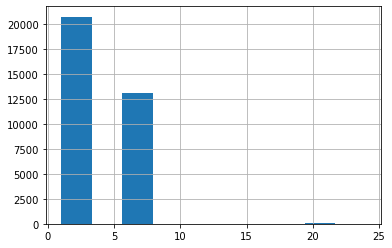

In [178]:
df['heatingorsystemtypeid'].hist()